In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')
import pandas.util.testing as tm

In [4]:
col_names=["id","qid1","qid2","question1","question2","is_duplicate"]

In [5]:
df = pd.read_csv('train.csv',encoding=('ISO-8859-1'),names=col_names)
df

,id,qid1,qid2,question1,question2,is_duplicate
0,id,qid1,qid2,question1,question2,is_duplicate
1,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
2,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
3,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
4,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
...,...,...,...,...,...,...
404286,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404287,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404288,404287,537928,537929,What is one coin?,What's this coin?,0
404289,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404291 entries, 0 to 404290
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404291 non-null  object
 1   qid1          404291 non-null  object
 2   qid2          404291 non-null  object
 3   question1     404290 non-null  object
 4   question2     404289 non-null  object
 5   is_duplicate  404291 non-null  object
dtypes: object(6)
memory usage: 18.5+ MB


In [7]:
temp_df = pd.concat([df[df['is_duplicate'] == '0'],df[df['is_duplicate'] == '1']])

In [8]:
temp_df['is_duplicate']=pd.to_numeric(temp_df['is_duplicate'])

In [9]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404268 entries, 1 to 404287
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404268 non-null  object
 1   qid1          404268 non-null  object
 2   qid2          404268 non-null  object
 3   question1     404267 non-null  object
 4   question2     404266 non-null  object
 5   is_duplicate  404268 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 21.6+ MB


In [10]:
temp_df['is_duplicate'].value_counts()

0    255006
1    149262
Name: is_duplicate, dtype: int64

In [11]:
new_df = temp_df.sample(15000,random_state=2)

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 149186 to 140689
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            15000 non-null  object
 1   qid1          15000 non-null  object
 2   qid2          15000 non-null  object
 3   question1     15000 non-null  object
 4   question2     15000 non-null  object
 5   is_duplicate  15000 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 820.3+ KB


In [13]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

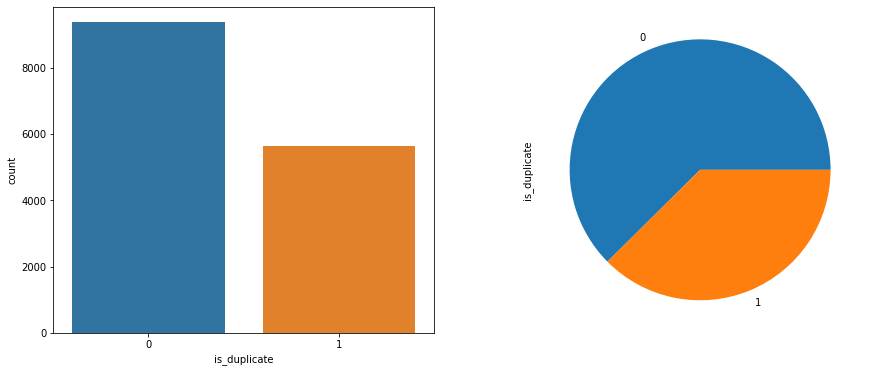

In [14]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=new_df['is_duplicate'])
plt.subplot(1, 2, 2)
new_df['is_duplicate'].value_counts().plot.pie(y='Class')

In [15]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words=stopwords.words("english")

In [16]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [17]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [18]:
new_df['question1']=new_df['question1'].apply(transform_text)
new_df['question2']=new_df['question2'].apply(transform_text)
new_df

,id,qid1,qid2,question1,question2,is_duplicate
149186,149185,235059,49789,sociolog educ role teacher educ import,sociolog educ,1
108882,108881,178801,4639,follow stori snapchat,add friend back snapchat,0
392655,392654,525363,525364,much corpor lawyer make per year,much lawyer make,1
364547,364546,494603,494604,best locat bhk flat gurgaon,best locat gurgaon bhk flat,1
86714,86713,146191,146192,best stori outsmart devil,map tell best stori,0
...,...,...,...,...,...,...
390457,390456,198385,522961,hcl solubl water,propanol solubl water,0
240540,240539,203584,352372,number fit blank 16 06 68 88 98,miss number seri 167,0
112148,112147,183542,407,hillari clinton hate cycl compar 2012,peopl hate hillari clinton,0
124581,124580,201139,201140,thing one know start startup,thing know start startup,1


In [46]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
149186,sociolog educ role teacher educ import,sociolog educ
108882,follow stori snapchat,add friend back snapchat
392655,much corpor lawyer make per year,much lawyer make
364547,best locat bhk flat gurgaon,best locat gurgaon bhk flat
86714,best stori outsmart devil,map tell best stori


In [47]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(15000, 20)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
149186,1,38,13,6,2,2,7,0.29,0.999950,0.399992,0.0,0.0,0.999950,0.333328,0.0,1.0,51,100,51,100
108882,0,21,24,3,4,1,7,0.14,0.333322,0.249994,0.0,0.0,0.333322,0.249994,1.0,0.0,53,59,44,55
392655,1,32,16,6,3,3,9,0.33,0.999967,0.499992,0.0,0.0,0.999967,0.499992,0.0,1.0,67,75,67,100
364547,1,27,27,5,5,5,10,0.50,0.999980,0.999980,0.0,0.0,0.999980,0.999980,0.0,1.0,70,70,100,100
86714,0,25,19,4,4,2,8,0.25,0.499988,0.499988,0.0,0.0,0.499988,0.499988,0.0,0.0,45,53,59,69


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=500)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [49]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df3 = pd.concat([temp_df1, temp_df2], axis=1)
temp_df3.shape

(15000, 1000)

In [50]:
final_df = pd.concat([final_df, temp_df3], axis=1)
print(final_df.shape)
final_df.head()

(15000, 1020)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,490,491,492,493,494,495,496,497,498,499
149186,1,38,13,6,2,2,7,0.29,0.999950,0.399992,...,0,0,0,0,0,0,0,0,0,0
108882,0,21,24,3,4,1,7,0.14,0.333322,0.249994,...,0,0,0,0,0,0,0,0,0,0
392655,1,32,16,6,3,3,9,0.33,0.999967,0.499992,...,0,0,0,0,0,0,0,0,0,0
364547,1,27,27,5,5,5,10,0.50,0.999980,0.999980,...,0,0,0,0,0,0,0,0,0,0
86714,0,25,19,4,4,2,8,0.25,0.499988,0.499988,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y=final_df['is_duplicate']
x=final_df.drop(labels=['is_duplicate'],axis=1)

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7536666666666667

In [27]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
149186,149185,235059,49789,sociolog educ role teacher educ import,sociolog educ,1,38,13
108882,108881,178801,4639,follow stori snapchat,add friend back snapchat,0,21,24
392655,392654,525363,525364,much corpor lawyer make per year,much lawyer make,1,32,16
364547,364546,494603,494604,best locat bhk flat gurgaon,best locat gurgaon bhk flat,1,27,27
86714,86713,146191,146192,best stori outsmart devil,map tell best stori,0,25,19
...,...,...,...,...,...,...,...,...
390457,390456,198385,522961,hcl solubl water,propanol solubl water,0,16,21
240540,240539,203584,352372,number fit blank 16 06 68 88 98,miss number seri 167,0,31,20
112148,112147,183542,407,hillari clinton hate cycl compar 2012,peopl hate hillari clinton,0,37,26
124581,124580,201139,201140,thing one know start startup,thing know start startup,1,28,24


In [28]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
149186,149185,235059,49789,sociolog educ role teacher educ import,sociolog educ,1,38,13,6,2
108882,108881,178801,4639,follow stori snapchat,add friend back snapchat,0,21,24,3,4
392655,392654,525363,525364,much corpor lawyer make per year,much lawyer make,1,32,16,6,3
364547,364546,494603,494604,best locat bhk flat gurgaon,best locat gurgaon bhk flat,1,27,27,5,5
86714,86713,146191,146192,best stori outsmart devil,map tell best stori,0,25,19,4,4


In [29]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [30]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
149186,149185,235059,49789,sociolog educ role teacher educ import,sociolog educ,1,38,13,6,2,2
108882,108881,178801,4639,follow stori snapchat,add friend back snapchat,0,21,24,3,4,1
392655,392654,525363,525364,much corpor lawyer make per year,much lawyer make,1,32,16,6,3,3
364547,364546,494603,494604,best locat bhk flat gurgaon,best locat gurgaon bhk flat,1,27,27,5,5,5
86714,86713,146191,146192,best stori outsmart devil,map tell best stori,0,25,19,4,4,2


In [31]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [32]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
149186,149185,235059,49789,sociolog educ role teacher educ import,sociolog educ,1,38,13,6,2,2,7
108882,108881,178801,4639,follow stori snapchat,add friend back snapchat,0,21,24,3,4,1,7
392655,392654,525363,525364,much corpor lawyer make per year,much lawyer make,1,32,16,6,3,3,9
364547,364546,494603,494604,best locat bhk flat gurgaon,best locat gurgaon bhk flat,1,27,27,5,5,5,10
86714,86713,146191,146192,best stori outsmart devil,map tell best stori,0,25,19,4,4,2,8


In [33]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
149186,149185,235059,49789,sociolog educ role teacher educ import,sociolog educ,1,38,13,6,2,2,7,0.29
108882,108881,178801,4639,follow stori snapchat,add friend back snapchat,0,21,24,3,4,1,7,0.14
392655,392654,525363,525364,much corpor lawyer make per year,much lawyer make,1,32,16,6,3,3,9,0.33
364547,364546,494603,494604,best locat bhk flat gurgaon,best locat gurgaon bhk flat,1,27,27,5,5,5,10,0.50
86714,86713,146191,146192,best stori outsmart devil,map tell best stori,0,25,19,4,4,2,8,0.25


In [34]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [35]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [44]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [45]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))